In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df = pd.read_csv("../../datasets/famcs_students.csv")
df

,cource,group,stream,sex,age,ss,interest,os,weekend_study,bad_sleep,glasses,work_experience,ai,height,anime,social,sport,miss,study_form,foot_size,eye_color,score,retake,hostel,literature
0,4,11,Прикладная информатика,М,20.0,Нет,Математика,MacOS,Да,Да,Нет,Меньше года,Cursor,192.0,Нет,Экстраверт,"Редко, легкая физкультура",3.0,Бюджет,48.0,Карие,9.20,0,"Нет, я из Минска",Да
1,4,11,Прикладная информатика,Ж,20.0,Нет,Программирование,MacOS,Нет,Нет,Нет,1-2 года,Mistral,169.0,Нет,Экстраверт,"Да, я спортсмен",5.0,Бюджет,39.0,Зеленые,8.80,0,"Нет, я из Минска",Да
2,4,11,Прикладная информатика,Ж,19.0,Нет,Программирование,MacOS,Да,Нет,Нет,Меньше года,ChatGPT,190.0,Нет,Экстраверт,Вообще нет,10.0,Бюджет,41.0,Карие,8.80,0,"Нет, я из Минска",Да
3,4,11,Прикладная информатика,Ж,20.0,Нет,Математика,MacOS,Да,Да,Нет,1-2 года,Qwen,158.0,Нет,Экстраверт,"Да, я спортсмен",3.0,Бюджет,36.0,Карие,8.80,0,"Нет, я из Минска",Да
4,4,11,Прикладная информатика,М,20.0,Нет,Математика,Windows,Да,Нет,Нет,Не работаю,DeepSeek,187.0,Нет,Интроверт,Вообще нет,1.0,Бюджет,46.0,Зеленые,9.00,0,"Нет, я из Минска",Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,4,1,Информатика,М,20.0,Нет,Программирование,Windows,Нет,Нет,Да,Не работаю,ChatGPT,185.0,Да,Экстраверт,Вообще нет,1.0,Бюджет,45.0,Карие,6.29,0,"Нет, я из Минска",Да
123,4,1,Информатика,Ж,22.0,Нет,Программирование,Windows,Да,Да,Да,Не работаю,ChatGPT,169.0,Нет,Интроверт,"Редко, легкая физкультура",0.0,Бюджет,39.0,Карие,6.00,0,"Нет, я из регионов",Нет
124,4,1,Информатика,М,21.0,Нет,Математика,Windows,Нет,Нет,Да,Не работаю,DeepSeek,183.0,Нет,Экстраверт,"Да, я спортсмен",10.0,Бюджет,44.0,Карие,7.00,0,"Нет, я из Минска",Нет
125,4,1,Информатика,М,20.0,Нет,Программирование,Windows,Да,Да,Нет,1-2 года,ChatGPT,187.0,Да,Интроверт,"Да, я спортсмен",1.0,Бюджет,45.0,Карие,7.00,0,"Нет, я из регионов",Нет


In [2]:
binary_cols = [
    "ss",
    "interest",
    "weekend_study",
    "bad_sleep",
    "glasses",
    "anime",
    "study_form",
]

N = 22

target_col = binary_cols[N % 8]
print("Целевая переменная y =", target_col)

selected_features = [
    'stream', 'sex', 'age', 'ss', 'interest', 'weekend_study', 'work_experience',
    'social', 'miss', 'score', 'retake', 'hostel', 'study_form'
]

df = df[selected_features]

df

X = df.drop(columns=[target_col])

Целевая переменная y = study_form


In [3]:
bin_map = {
'sex' : {'Ж': 0, 'М': 1},
'ss': {'Нет': 0, 'Да': 1},
'interest': {'Математика': 0, 'Программирование': 1},
'weekend_study': {'Нет': 0, 'Да': 1}
}

for col, mapping in bin_map.items():
    X[col] = X[col].map(mapping)

X

,stream,sex,age,ss,interest,weekend_study,work_experience,social,miss,score,retake,hostel
0,Прикладная информатика,1,20.0,0,0,1,Меньше года,Экстраверт,3.0,9.20,0,"Нет, я из Минска"
1,Прикладная информатика,0,20.0,0,1,0,1-2 года,Экстраверт,5.0,8.80,0,"Нет, я из Минска"
2,Прикладная информатика,0,19.0,0,1,1,Меньше года,Экстраверт,10.0,8.80,0,"Нет, я из Минска"
3,Прикладная информатика,0,20.0,0,0,1,1-2 года,Экстраверт,3.0,8.80,0,"Нет, я из Минска"
4,Прикладная информатика,1,20.0,0,0,1,Не работаю,Интроверт,1.0,9.00,0,"Нет, я из Минска"
...,...,...,...,...,...,...,...,...,...,...,...,...
122,Информатика,1,20.0,0,1,0,Не работаю,Экстраверт,1.0,6.29,0,"Нет, я из Минска"
123,Информатика,0,22.0,0,1,1,Не работаю,Интроверт,0.0,6.00,0,"Нет, я из регионов"
124,Информатика,1,21.0,0,0,0,Не работаю,Экстраверт,10.0,7.00,0,"Нет, я из Минска"
125,Информатика,1,20.0,0,1,1,1-2 года,Интроверт,1.0,7.00,0,"Нет, я из регионов"


In [4]:
y_map = {
    'Бюджет': 0,
    'Платная': 1
}

y = df[target_col].map(y_map)

y

0      0
1      0
2      0
3      0
4      0
      ..
122    0
123    0
124    0
125    0
126    1
Name: study_form, Length: 127, dtype: int64

In [5]:
one_hot_cols = ['stream', 'work_experience', 'social', 'retake', 'hostel']
X = pd.get_dummies(X, columns=one_hot_cols, drop_first=True).astype(float)
X

,sex,age,ss,interest,weekend_study,miss,score,stream_Прикладная информатика,stream_Прикладная математика,work_experience_Меньше года,work_experience_Не работаю,work_experience_более 2 лет,social_Социофоб,social_Экстраверт,retake_1,retake_2+,"hostel_Нет, я из Минска","hostel_Нет, я из регионов"
0,1.0,20.0,0.0,0.0,1.0,3.0,9.20,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,20.0,0.0,1.0,0.0,5.0,8.80,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,19.0,0.0,1.0,1.0,10.0,8.80,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,20.0,0.0,0.0,1.0,3.0,8.80,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,20.0,0.0,0.0,1.0,1.0,9.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1.0,20.0,0.0,1.0,0.0,1.0,6.29,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
123,0.0,22.0,0.0,1.0,1.0,0.0,6.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
124,1.0,21.0,0.0,0.0,0.0,10.0,7.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
125,1.0,20.0,0.0,1.0,1.0,1.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Размеры выборок:")
print("Тренировочная:", X_train.shape, y_train.shape)
print("Валидационная:", X_val.shape, y_val.shape)
print("Тестовая:", X_test.shape, y_test.shape)

Размеры выборок:
Тренировочная: (88, 18) (88,)
Валидационная: (19, 18) (19,)
Тестовая: (20, 18) (20,)


# 0. Тривиальный классификатор

In [7]:
majority_class = y_train.mode()[0]
print("Наиболее частый класс:", majority_class)

Наиболее частый класс: 0


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from matplotlib.colors import ListedColormap

def evaluate(y_true, y_pred, y_pred_proba=None, calc_auc=False):
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred, zero_division=0), 4))
    print("Recall:", round(recall_score(y_true, y_pred, zero_division=0), 4))

    cm = confusion_matrix(y_true, y_pred)

    colors = np.array([[0, 1], [2, 0]])
    cmap = ListedColormap(["#ccffcc", "#ffcccc", "#ffcccc"])

    fig, ax = plt.subplots(figsize=(4,4))
    cax = ax.matshow(colors, cmap=cmap)

    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', fontsize=16)

    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xticklabels(["Pred 0", "Pred 1"])
    ax.set_yticklabels(["True 0", "True 1"])
    ax.set_title("Confusion Matrix", fontsize=14)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    if calc_auc:
        print("ROC-AUC:", round(roc_auc_score(y_true, y_pred_proba), 4))

=== Тривиальный классификатор ===
Accuracy: 0.75
Precision: 0.0
Recall: 0.0


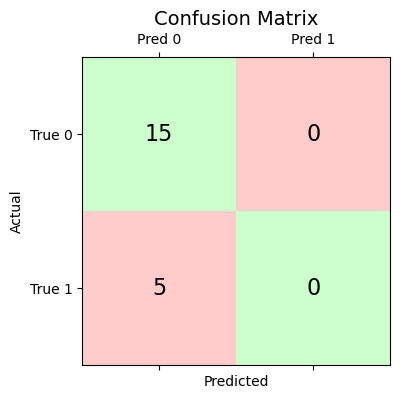

In [9]:
y_pred_test = np.full_like(y_test, fill_value=majority_class)
print("=== Тривиальный классификатор ===")
evaluate(y_test, y_pred_test, calc_auc=False)

# 1. Наивный байесовский классификатор


=== Наивный Байес ===
Accuracy: 0.35
Precision: 0.2778
Recall: 1.0


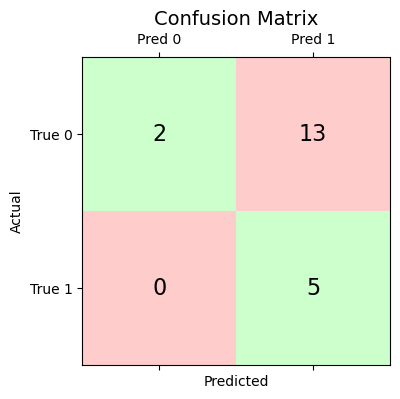

In [10]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        classes, cls_counts = np.unique(y, return_counts=True)
        n_classes = len(classes)
        self.priors = cls_counts / len(y)

        self.X_cls_mean = np.array([np.mean(X[y == c], axis=0) for c in range(n_classes)])
        self.X_stds = np.array([np.std(X[y == c], axis=0) for c in range(n_classes)])
        self.X_stds = np.maximum(self.X_stds, 1e-8)

    def pdf(self, x, mean, std):
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    def predict(self, X):
        X = np.asarray(X)
        pdfs = np.array([self.pdf(x, self.X_cls_mean, self.X_stds) for x in X])
        posteriors = self.priors * np.prod(pdfs, axis=2)

        return np.argmax(posteriors, axis=1)

nb_clf = GaussianNaiveBayes()
nb_clf.fit(X_train, y_train)
nb_clf_pred_res = nb_clf.predict(X_test)

print("\n=== Наивный Байес ===")
evaluate(y_test, nb_clf_pred_res)

# 2. Метод k-ближайших соседей

In [11]:
from sklearn.preprocessing import MinMaxScaler

knn_scaler = MinMaxScaler()
X_train_knn = knn_scaler.fit_transform(X_train)
X_val_knn = knn_scaler.transform(X_val)
X_test_knn = knn_scaler.transform(X_test)

Лучшее k на валидации: 4 с accuracy: 0.7368

=== KNN на тестовой выборке ===
Accuracy: 0.75
Precision: 0.5
Recall: 0.2


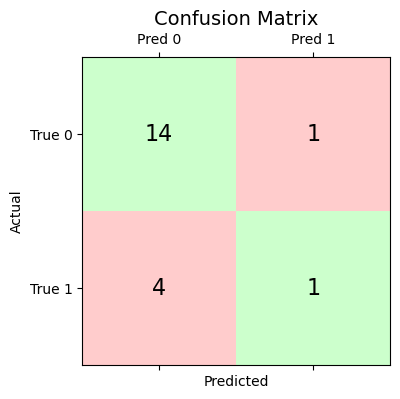

In [12]:
class KNearestNeighbors:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = np.asarray(X_train)
        self.y_train = np.asarray(y_train)

    def _euclidean_distances(self, x_test_i):
        return np.sqrt(np.sum((self.X_train - x_test_i) ** 2, axis=1))

    def _make_prediction(self, x_test_i):
        distances = self._euclidean_distances(x_test_i)
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
        targets = self.y_train[k_nearest_indexes]
        return np.bincount(targets).argmax()

    def predict(self, X_test):
        X_test = np.asarray(X_test)
        return np.array([self._make_prediction(x) for x in X_test])


best_k = 1
best_acc = 0

for k in range(1, 21):
    knn = KNearestNeighbors(n_neighbors=k)
    knn.fit(X_train_knn, y_train)
    y_val_pred = knn.predict(X_val_knn)
    acc = accuracy_score(y_val, y_val_pred)
    if acc > best_acc:
        best_acc = acc
        best_k = k

print("Лучшее k на валидации:", best_k, "с accuracy:", round(best_acc, 4))

knn_final = KNearestNeighbors(n_neighbors=best_k)
knn_final.fit(X_train_knn, y_train)
y_test_pred = knn_final.predict(X_test_knn)

print("\n=== KNN на тестовой выборке ===")
evaluate(y_test, y_test_pred)

# 3. Логистическая регрессия

In [13]:
class LogisticRegression:
    def __init__(self, lambda_=0.1, max_iter=2000, epsilon=1e-5):
        self.lambda_ = lambda_
        self.max_iter = max_iter
        self.epsilon = epsilon

    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-np.clip(z, -35, 35)))

    def _prepare(self, X):
        X = np.asarray(X)
        ones = np.ones((X.shape[0], 1))
        return np.hstack([ones, X]).astype(float)

    def fit(self, X, y):
        X = self._prepare(X)
        y = np.asarray(y).reshape(-1, 1)
        self.weights_ = np.zeros((X.shape[1], 1))

        for i in range(self.max_iter):
            grad = X.T @ ((self._sigmoid(X @ self.weights_)) - y)
            
            w_new = self.weights_ - self.lambda_ * grad

            if np.linalg.norm(grad) < self.epsilon or np.linalg.norm(w_new - self.weights_) < self.epsilon:
                print(f"Остановка на итерации {i}")
                self.weights_ = w_new
                break

            self.weights_ = w_new

        return self

    def predict_proba(self, X):
        X = self._prepare(X)
        logits = X @ self.weights_
        return self._sigmoid(logits).ravel()

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


logreg = LogisticRegression(lambda_=1e-7, max_iter=5_000_000, epsilon=1e-6)
logreg.fit(X_train_knn, y_train)

logreg.predict_proba(X_val_knn)[:5]

Остановка на итерации 251284


array([0.23504756, 0.34424812, 0.25328782, 0.27941034, 0.36810613])

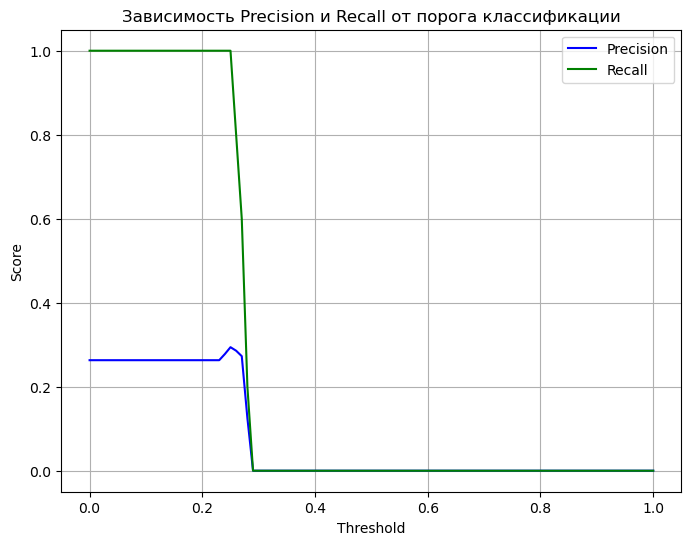

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

thresholds = np.arange(0.0, 1.01, 0.01)

precisions = []
recalls = []

for t in thresholds:
    y_pred = logreg.predict(X_val_knn, threshold=t)
    precisions.append(precision_score(y_val, y_pred, zero_division=0))
    recalls.append(recall_score(y_val, y_pred, zero_division=0))


plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label="Precision", color='blue')
plt.plot(thresholds, recalls, label="Recall", color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Зависимость Precision и Recall от порога классификации")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import f1_score

f1_scores = []

for t in thresholds:
    y_pred = logreg.predict(X_val_knn, threshold=t)
    f1_scores.append(f1_score(y_val, y_pred))

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Оптимальный порог: {best_threshold:.2f}, F1: {best_f1:.3f}")

Оптимальный порог: 0.25, F1: 0.455



=== Логистическая регрессия ===
Accuracy: 0.4
Precision: 0.2941
Recall: 1.0


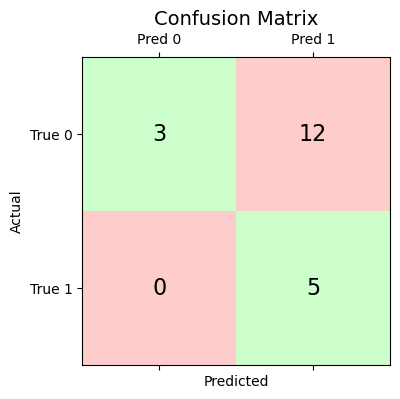

ROC-AUC: 0.5867


In [16]:
y_test_proba = logreg.predict_proba(X_test_knn)
y_test_pred = logreg.predict(X_test_knn, threshold=best_threshold)
print("\n=== Логистическая регрессия ===")
evaluate(y_test, y_test_pred, y_pred_proba=y_test_proba, calc_auc=True)